In [1]:
!pip install nltk scikit-learn

In [2]:
import nltk
from sklearn.naive_bayes import MultinomialNB
import numpy as np

# Download NLTK stopwords
nltk.download('stopwords')

# Questions to ask the user
questions = [
    "How would you describe your body frame? (Thin, Moderate, Large)",
    "How do you handle cold weather? (Love it, Neutral, Dislike it)",
    "How is your energy level during the day? (Low, Medium, High)",
    "What is your skin type? (Dry, Oily, Normal)",
    "How would you describe your temperament? (Calm, Irritable, Passionate)"
]

# Answer mapping for each question related to Vata, Pitta, and Kapha
answer_mapping = {
    "Thin": "Vata", "Moderate": "Pitta", "Large": "Kapha",
    "Love it": "Vata", "Neutral": "Pitta", "Dislike it": "Kapha",
    "Low": "Vata", "Medium": "Pitta", "High": "Kapha",
    "Dry": "Vata", "Oily": "Pitta", "Normal": "Kapha",
    "Calm": "Kapha", "Irritable": "Pitta", "Passionate": "Vata"
}

# Prakruti Recommendations based on dosha
recommendations = {
    "Vata": {
        "Diet": "Warm, cooked, and nourishing foods like soups, stews, and root vegetables.",
        "Lifestyle": "Stick to a regular routine with calming activities like yoga and meditation."
    },
    "Pitta": {
        "Diet": "Cooling foods such as fruits, vegetables, and grains. Avoid spicy, salty, and sour foods.",
        "Lifestyle": "Engage in calming exercises, avoid overworking, and practice stress relief techniques."
    },
    "Kapha": {
        "Diet": "Light, dry, and spicy foods like green vegetables, legumes, and spices.",
        "Lifestyle": "Stay active with stimulating exercises, avoid heavy and oily foods, and maintain a dynamic lifestyle."
    }
}


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DIVYA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Import necessary libraries
import numpy as np

# Questions to ask the user
questions = [
    "How would you describe your body frame? (Thin, Moderate, Large)",
    "How do you handle cold weather? (Love it, Neutral, Dislike it)",
    "How is your energy level during the day? (Low, Medium, High)",
    "What is your skin type? (Dry, Oily, Normal)",
    "How would you describe your temperament? (Calm, Irritable, Passionate)"
]

# Answer mapping for each question related to Vata, Pitta, and Kapha
answer_mapping = {
    "Thin": "Vata", "Moderate": "Pitta", "Large": "Kapha",
    "Love it": "Vata", "Neutral": "Pitta", "Dislike it": "Kapha",
    "Low": "Vata", "Medium": "Pitta", "High": "Kapha",
    "Dry": "Vata", "Oily": "Pitta", "Normal": "Kapha",
    "Calm": "Kapha", "Irritable": "Pitta", "Passionate": "Vata"
}

# Prakruti Recommendations based on dosha
recommendations = {
    "Vata": {
        "Diet": "Warm, cooked, and nourishing foods like soups, stews, and root vegetables.",
        "Lifestyle": "Stick to a regular routine with calming activities like yoga and meditation."
    },
    "Pitta": {
        "Diet": "Cooling foods such as fruits, vegetables, and grains. Avoid spicy, salty, and sour foods.",
        "Lifestyle": "Engage in calming exercises, avoid overworking, and practice stress relief techniques."
    },
    "Kapha": {
        "Diet": "Light, dry, and spicy foods like green vegetables, legumes, and spices.",
        "Lifestyle": "Stay active with stimulating exercises, avoid heavy and oily foods, and maintain a dynamic lifestyle."
    }
}

# Function to ask questions and map answers
def prakruti_assessment():
    user_answers = []
    
    for question in questions:
        answer = input(question + "\n")
        dosha = answer_mapping.get(answer, "Unknown")
        user_answers.append(dosha)
    
    # Count the occurrences of Vata, Pitta, Kapha
    dosha_counts = {
        "Vata": user_answers.count("Vata"),
        "Pitta": user_answers.count("Pitta"),
        "Kapha": user_answers.count("Kapha")
    }

    # Determine the dominant dosha
    dominant_dosha = max(dosha_counts, key=dosha_counts.get)

    print(f"\nYour dominant dosha is: {dominant_dosha}")
    print("\nRecommendations:")
    for key, value in recommendations[dominant_dosha].items():
        print(f"{key}: {value}")

# Call the assessment function to run the program
prakruti_assessment()


In [5]:
import pandas as pd

# Dataset containing questions related to Prakruti types
data = {
    "question": [
        "Do you feel cold easily?",
        "Do you sweat excessively?",
        "Is your skin dry or rough?",
        "Do you feel hot often?",
        "Do you suffer from indigestion frequently?",
        "Do you sleep lightly and wake up frequently?",
        "Do you prefer warm weather over cold?",
        "Is your mood often anxious or restless?",
        "Do you gain weight easily?",
        "Is your hair thin or brittle?"
    ],
    "Vata": [1, 0, 1, 0, 0, 1, 0, 1, 0, 1],
    "Pitta": [0, 1, 0, 1, 1, 0, 1, 0, 0, 0],
    "Kapha": [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
}

df = pd.DataFrame(data)
df.to_csv('ayurveda_prakruti_questions.csv', index=False)
df.head()


,question,Vata,Pitta,Kapha
0,Do you feel cold easily?,1,0,0
1,Do you sweat excessively?,0,1,0
2,Is your skin dry or rough?,1,0,0
3,Do you feel hot often?,0,1,0
4,Do you suffer from indigestion frequently?,0,1,0


In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('ayurveda_prakruti_questions.csv')

# Function to ask questions and record responses
def ask_questions():
    vata_score = 0
    pitta_score = 0
    kapha_score = 0
    
    for index, row in df.iterrows():
        print(row['question'])
        answer = input("Enter Yes or No: ").lower()
        
        if answer == 'yes':
            vata_score += row['Vata']
            pitta_score += row['Pitta']
            kapha_score += row['Kapha']
    
    return vata_score, pitta_score, kapha_score

# Function to calculate the Prakruti
def calculate_prakruti(vata_score, pitta_score, kapha_score):
    scores = {'Vata': vata_score, 'Pitta': pitta_score, 'Kapha': kapha_score}
    dominant_prakruti = max(scores, key=scores.get)
    
    print(f"\nYour dominant Prakruti is: {dominant_prakruti}")
    
    # Suggestions based on the Prakruti
    if dominant_prakruti == 'Vata':
        print("Suggested diet: Warm, moist, nourishing foods.")
    elif dominant_prakruti == 'Pitta':
        print("Suggested diet: Cool, non-spicy, and sweet foods.")
    elif dominant_prakruti == 'Kapha':
        print("Suggested diet: Light, dry, and spicy foods.")
    
# Main function to run the chatbot
def ayursutra_chatbot():
    print("Welcome to Ayursutra Chatbot!")
    vata_score, pitta_score, kapha_score = ask_questions()
    calculate_prakruti(vata_score, pitta_score, kapha_score)

# Run the chatbot
ayursutra_chatbot()


Welcome to Ayursutra Chatbot!
Do you feel cold easily?


Enter Yes or No:  yes


Do you sweat excessively?


Enter Yes or No:  no


Is your skin dry or rough?


Enter Yes or No:  no


Do you feel hot often?


Enter Yes or No:  no


Do you suffer from indigestion frequently?


Enter Yes or No:  no


Do you sleep lightly and wake up frequently?


Enter Yes or No:  no


Do you prefer warm weather over cold?


Enter Yes or No:  yes


Is your mood often anxious or restless?


Enter Yes or No:  no


Do you gain weight easily?


Enter Yes or No:  no


Is your hair thin or brittle?


Enter Yes or No:  no



Your dominant Prakruti is: Vata
Suggested diet: Warm, moist, nourishing foods.


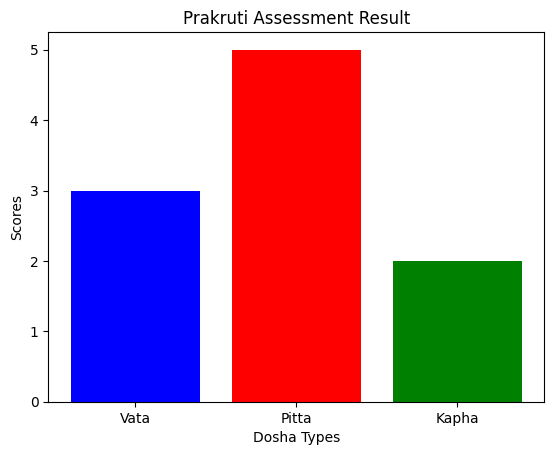

In [7]:
import matplotlib.pyplot as plt

def plot_prakruti(vata_score, pitta_score, kapha_score):
    labels = ['Vata', 'Pitta', 'Kapha']
    scores = [vata_score, pitta_score, kapha_score]

    plt.bar(labels, scores, color=['blue', 'red', 'green'])
    plt.xlabel('Dosha Types')
    plt.ylabel('Scores')
    plt.title('Prakruti Assessment Result')
    plt.show()

# Call the function after getting scores
vata_score, pitta_score, kapha_score = 3, 5, 2  # Example scores, replace with actual results
plot_prakruti(vata_score, pitta_score, kapha_score)


Welcome to Ayursutra Chatbot!

1. Prakruti Assessment
2. Ask a Health Question
3. Exit


Choose an option:  1


Please answer the following questions with 'Yes' or 'No':
Do you feel cold easily?


Enter Yes or No:  yes


Do you sweat excessively?


Enter Yes or No:  no


Is your skin dry or rough?


Enter Yes or No:  no


Do you feel hot often?


Enter Yes or No:  no


Do you suffer from indigestion frequently?


Enter Yes or No:  no


Do you sleep lightly and wake up frequently?


Enter Yes or No:  no


Do you prefer warm weather over cold?


Enter Yes or No:  yes


Is your mood often anxious or restless?


Enter Yes or No:  no


Do you gain weight easily?


Enter Yes or No:  no


Is your hair thin or brittle?


Enter Yes or No:  no



Your dominant Prakruti is: Vata

--- Vata Remedies ---
Foods: Warm soups, cooked grains, nuts, and oils.
Lifestyle: Keep warm, maintain regular routine, and avoid cold and dry environments.
Home Remedies: Warm milk with turmeric, ginger tea.


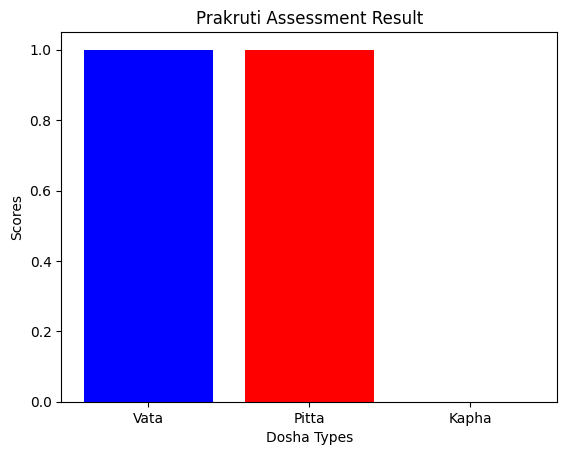


1. Prakruti Assessment
2. Ask a Health Question
3. Exit


Choose an option:  2
Please enter your health question:  iam suffering from severe cold



Response: For colds, drink hot ginger tea with honey and do steam inhalation with eucalyptus oil.

1. Prakruti Assessment
2. Ask a Health Question
3. Exit


Choose an option:  3


Thank you for using Ayursutra Chatbot! Stay healthy!


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Dataset containing questions related to Prakruti types
data = {
    "question": [
        "Do you feel cold easily?",
        "Do you sweat excessively?",
        "Is your skin dry or rough?",
        "Do you feel hot often?",
        "Do you suffer from indigestion frequently?",
        "Do you sleep lightly and wake up frequently?",
        "Do you prefer warm weather over cold?",
        "Is your mood often anxious or restless?",
        "Do you gain weight easily?",
        "Is your hair thin or brittle?"
    ],
    "Vata": [1, 0, 1, 0, 0, 1, 0, 1, 0, 1],
    "Pitta": [0, 1, 0, 1, 1, 0, 1, 0, 0, 0],
    "Kapha": [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
}

df = pd.DataFrame(data)

# Step 2: Ask Questions and Calculate Prakruti Scores
def ask_questions():
    vata_score = 0
    pitta_score = 0
    kapha_score = 0
    
    print("Please answer the following questions with 'Yes' or 'No':")
    
    for index, row in df.iterrows():
        print(row['question'])
        answer = input("Enter Yes or No: ").lower()
        
        if answer == 'yes':
            vata_score += row['Vata']
            pitta_score += row['Pitta']
            kapha_score += row['Kapha']
    
    return vata_score, pitta_score, kapha_score

# Step 3: Provide Food, Lifestyle, and Home Remedies Based on Prakruti
def suggest_remedies(prakruti):
    if prakruti == 'Vata':
        print("\n--- Vata Remedies ---")
        print("Foods: Warm soups, cooked grains, nuts, and oils.")
        print("Lifestyle: Keep warm, maintain regular routine, and avoid cold and dry environments.")
        print("Home Remedies: Warm milk with turmeric, ginger tea.")
    elif prakruti == 'Pitta':
        print("\n--- Pitta Remedies ---")
        print("Foods: Cool, sweet fruits, dairy, rice, and cucumbers.")
        print("Lifestyle: Avoid overheating, stay in cool environments, and avoid spicy foods.")
        print("Home Remedies: Aloe vera juice, cooling coconut oil massage.")
    elif prakruti == 'Kapha':
        print("\n--- Kapha Remedies ---")
        print("Foods: Light, spicy, and warm foods, such as lentils, ginger, and garlic.")
        print("Lifestyle: Stay active, avoid heavy and oily foods, and practice vigorous exercise.")
        print("Home Remedies: Ginger tea, honey with warm water.")

# Step 4: Prakruti Calculation and Results
def calculate_prakruti(vata_score, pitta_score, kapha_score):
    scores = {'Vata': vata_score, 'Pitta': pitta_score, 'Kapha': kapha_score}
    dominant_prakruti = max(scores, key=scores.get)
    
    print(f"\nYour dominant Prakruti is: {dominant_prakruti}")
    suggest_remedies(dominant_prakruti)
    
    return dominant_prakruti

# Step 5: Visualization
def plot_prakruti(vata_score, pitta_score, kapha_score):
    labels = ['Vata', 'Pitta', 'Kapha']
    scores = [vata_score, pitta_score, kapha_score]

    plt.bar(labels, scores, color=['blue', 'red', 'green'])
    plt.xlabel('Dosha Types')
    plt.ylabel('Scores')
    plt.title('Prakruti Assessment Result')
    plt.show()

# Step 6: General Health Query Handling
def health_query_response(query):
    responses = {
        "headache": "For headaches, try a gentle massage with peppermint oil and drink ginger tea.",
        "indigestion": "For indigestion, take a spoonful of ajwain seeds with warm water or drink fennel tea.",
        "dry skin": "For dry skin, apply warm sesame oil before a shower and stay hydrated.",
        "cold": "For colds, drink hot ginger tea with honey and do steam inhalation with eucalyptus oil."
    }
    
    for key, response in responses.items():
        if key in query.lower():
            return response
    return "I'm sorry, I don't have a specific remedy for that. Please consult a professional Ayurvedic doctor."

# Step 7: Main Function to Run Chatbot
def ayursutra_chatbot():
    print("Welcome to Ayursutra Chatbot!")
    
    while True:
        print("\n1. Prakruti Assessment\n2. Ask a Health Question\n3. Exit")
        choice = input("Choose an option: ")

        if choice == '1':
            vata_score, pitta_score, kapha_score = ask_questions()
            dominant_prakruti = calculate_prakruti(vata_score, pitta_score, kapha_score)
            plot_prakruti(vata_score, pitta_score, kapha_score)
        elif choice == '2':
            query = input("Please enter your health question: ")
            response = health_query_response(query)
            print(f"\nResponse: {response}")
        elif choice == '3':
            print("Thank you for using Ayursutra Chatbot! Stay healthy!")
            break
        else:
            print("Invalid option. Please try again.")

# Run the chatbot
ayursutra_chatbot()
